# Support Vector Machines

The purpose of this is to review Python syntax by fitting
a linear regression over simulated data.

In [138]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn import svm

#### Data Generating Process

In [139]:
def inverse_logit(x):
    return(1 / (1 + np.exp(-x)))

In [144]:
np.random.seed(123)
X1 = np.random.normal(1,3,size=1000)
X2 = np.random.normal(-3,1,size=1000)
Z = 3 + 3*X1 - 2*X2
probs = inverse_logit(Z)

y = np.random.binomial(size=1000,n=1,p=probs)

In [145]:
# Create pandas dataframe
df = pd.DataFrame(
    {'X1': X1,
     'X2': X2,
     'y': y        
    }
)

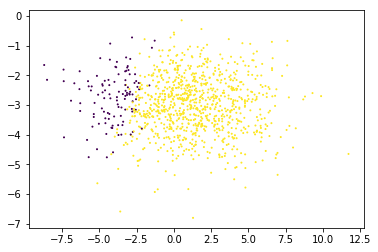

In [146]:
plt.scatter(X1,X2,c=y, s=1)
plt.show()

In [147]:
df.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.000000
mean,0.881308,-2.991611,0.890000
std,3.003865,0.958489,0.313046
min,-8.693165,-6.801378,0.000000
25%,-1.053670,-3.638925,1.000000
50%,0.876443,-2.951545,1.000000
75%,3.006597,-2.346117,1.000000
max,11.714738,-0.149292,1.000000


#### Scikit Learn

In [148]:
model = svm.LinearSVC(C=1)
model.fiat(df[['X1','X2']],df['y'])

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [149]:
print(model.intercept_)
print(model.coef_)

[ 0.95706552]
[[ 0.97377277 -0.63485292]]


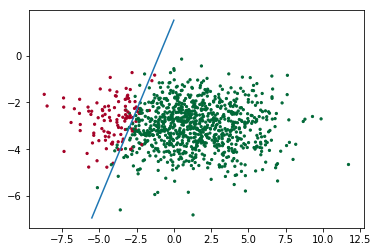

In [150]:
plt.scatter(X1,X2,c=y+2, s=5, cmap=plt.cm.RdYlGn)
plt.plot(np.linspace(-5.5,0,1000),(-np.linspace(-5.5,0,1000)*model.coef_[0][0]-model.intercept_)/model.coef_[0][1])
plt.show()